In [1]:
import typing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DataRow = list[int]

In [23]:
# 为文科理科分别生成测验分数段人数
def gen_quiz_data(art: int, sci: int) -> tuple[DataRow, DataRow]:
    """ 为文科理科分别生成测验分数段人数

    Args:
        art (int): 文科人数
        sci (int): 理科人数

    Returns:
        tuple[DataRow, DataRow]: 文科理科测验分数段人数

    """
    # 文科测验分数中心, 方差
    art_mean, art_std = 90, 10
    # 理科测验分数中心, 方差
    sci_mean, sci_std = 86, 12
    # 文科测验分数
    art_data = np.random.normal(art_mean, art_std, art).astype(int)
    # 理科测验分数
    sci_data = np.random.normal(sci_mean, sci_std, sci).astype(int)
    # 分数段 (0-59, 60-69, 70-79, 80-89, 90-100)
    bins = [0] + list(range(60, 101, 10))
    # 文科测验分数段人数 (0-59, 60-69, 70-79, 80-89, 90-100)
    art_data = np.histogram(art_data, bins=bins)[0]
    # 理科测验分数段人数 (0-59, 60-69, 70-79, 80-89, 90-100)
    sci_data = np.histogram(sci_data, bins=bins)[0]
    return art_data.tolist(), sci_data.tolist()

gen_quiz_data(67, 92)


([0, 1, 4, 23, 24], [1, 8, 23, 27, 27])

In [4]:
def gen_quiz_markdown_table(art_data: DataRow, sci_data: DataRow) -> str:
    """ 生成测验分数段人数 Markdown 表格

    Args:
        art_data (DataRow): 文科测验分数段人数
        sci_data (DataRow): 理科测验分数段人数

    Returns:
        str: Markdown 表格

    """
    head_text = """\
| 分数段 | 60以下 | 60-69 | 70-79 | 80-89 | 90-100 | 总计 |
| :----- | :----- | :---- | :---- | :---- | :----- | :--- |
"""
    # 总计
    total_data = [str(x + y) for x, y in zip(art_data, sci_data)]
    # 文科测验分数段人数总计
    art_total = sum(art_data)
    # 理科测验分数段人数总计
    sci_total = sum(sci_data)
    # 总计
    total = art_total + sci_total
    # 文科测验分数段人数
    art_data = [str(x) for x in art_data]
    # 理科测验分数段人数
    sci_data = [str(x) for x in sci_data]
    # 文科测验分数段人数 Markdown 表格
    art_table = "| 文科 | " + " | ".join(art_data) + f" | {art_total} |"
    # 理科测验分数段人数 Markdown 表格
    sci_table = "| 理科 | " + " | ".join(sci_data) + f" | {sci_total} |"
    # 总计 Markdown 表格
    total_table = "| 总计 | " + " | ".join(total_data) + f" | {total} |"
    # Markdown 表格
    table = head_text + art_table + '\n' + sci_table + '\n' + total_table
    return table

test_table = gen_quiz_markdown_table([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
print(test_table)

| 分数段 | 60以下 | 60-69 | 70-79 | 80-89 | 90-100 | 总计 |
| :----- | :----- | :---- | :---- | :---- | :----- | :--- |
| 文科 | 1 | 2 | 3 | 4 | 5 | 15 |
| 理科 | 6 | 7 | 8 | 9 | 10 | 40 |
| 总计 | 7 | 9 | 11 | 13 | 15 | 55 |


In [5]:
plt.rcParams['font.family'] = 'Source Han Sans SC'

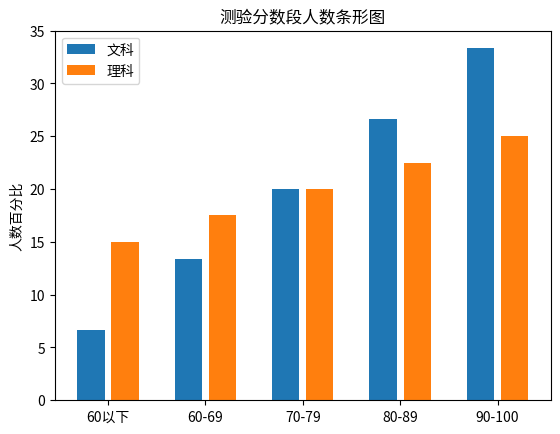

In [6]:
def plot_quiz_bargraph(art_data: DataRow, sci_data: DataRow) -> None:
    """ 画出测验分数段人数条形图

    Args:
        art_data (DataRow): 文科测验分数段人数
        sci_data (DataRow): 理科测验分数段人数

    """
    art_percent = [x * 100.0 / sum(art_data) for x in art_data]
    sci_percent = [x * 100.0 / sum(sci_data) for x in sci_data]
    
    x_labels = ["60以下", "60-69", "70-79", "80-89", "90-100"]
    x = np.arange(len(x_labels))
    width = 0.35
    # 文科测验分数段人数条形图
    art_bargraph = plt.bar(x - width / 2, art_percent, 0.8 * width, label="文科")
    # 理科测验分数段人数条形图
    sci_bargraph = plt.bar(x + width / 2, sci_percent, 0.8 * width, label="理科")
    # 设置 x 轴标签
    plt.xticks(x, x_labels)
    # 设置 y 轴标签
    plt.ylabel("人数百分比")
    # 设置图例
    plt.legend()
    # 设置标题
    plt.title("测验分数段人数条形图")
    # 显示条形图
    plt.show()

plot_quiz_bargraph([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])    

In [7]:
def gen_interested_level(total: int) -> DataRow:
    """ 生成感兴趣程度的人数

    Args:
        total (int): 总人数

    Returns:
        DataRow: 感兴趣程度的人数

    """
    # 感兴趣程度0-4, 0表示感兴趣程度最高，4表示感兴趣程度最低，权重为
    weights = [0.2, 0.3, 0.3, 0.1, 0.1]
    # 感兴趣程度的人数
    interested_level = np.random.multinomial(total, weights)
    return interested_level.tolist()

gen_interested_level(100)

[20, 34, 28, 10, 8]

In [8]:
def gen_interested_level_markdown_table(interested_level: DataRow) -> str:
    """ 生成感兴趣程度的人数 Markdown 表格

    Args:
        interested_level (DataRow): 感兴趣程度的人数

    Returns:
        str: Markdown 表格

    """
    head_text = """\
| 对党史学习兴趣程度 | 非常感兴趣 | 感兴趣 | 一般 | 不感兴趣 | 非常不感兴趣 | 总计 |
| :----------------- | :--------- | :----- | :--- | :------- | :------------- | :--- |
"""
    total = sum(interested_level)
    interested_level = [str(x) for x in interested_level]
    interested_level_table = "| 人数 | " + " | ".join(interested_level) + f" | {total} |"
    table = head_text + interested_level_table
    return table

print(gen_interested_level_markdown_table([1, 2, 3, 4, 5]))

| 对党史学习兴趣程度 | 非常感兴趣 | 感兴趣 | 一般 | 不感兴趣 | 非常不感兴趣 | 总计 |
| :----------------- | :--------- | :----- | :--- | :------- | :------------- | :--- |
| 人数 | 1 | 2 | 3 | 4 | 5 | 15 |


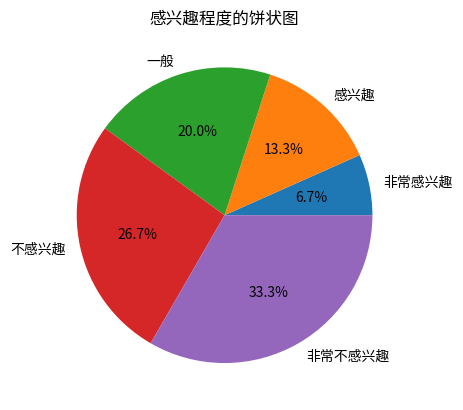

In [9]:
def plot_interested_level_pie_chart(interested_level: DataRow) -> None:
    """ 画出感兴趣程度的饼图

    Args:
        interested_level (DataRow): 感兴趣程度的人数

    """
    labels = ["非常感兴趣", "感兴趣", "一般", "不感兴趣", "非常不感兴趣"]
    plt.pie(interested_level, labels=labels, autopct="%1.1f%%")
    plt.title("感兴趣程度的饼状图")
    plt.show()

plot_interested_level_pie_chart([1, 2, 3, 4, 5])

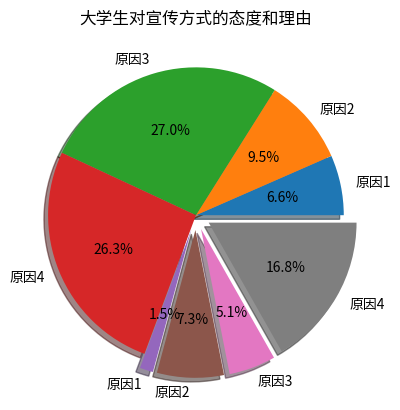

| 对宣传方式感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 原因1 | 9 | 6.57% |
| 原因2 | 13 | 9.49% |
| 原因3 | 37 | 27.01% |
| 原因4 | 36 | 26.28% |
| 感兴趣人数总计 | 95 | 69.34% |
| 原因1 | 2 | 1.46% |
| 原因2 | 10 | 7.30% |
| 原因3 | 7 | 5.11% |
| 原因4 | 23 | 16.79% |
| 不感兴趣人数总计 | 42 | 30.66% |
| 总计 | 137 | 100.00% |


In [12]:
Reasons = dict[str, float]

# 对宣传方式的态度和原因模板类
class AttitudeAndReasonTemplate:
    # 对宣传方式态度原因和权重
    def __init__(self, name: str,
                  total: int,
                  pop_percent: float,
                    popular_reason: Reasons,
                    unpopular_reason: Reasons) -> None:
        """ 对宣传方式的态度和原因模板类

        Args:
            attitude (str): 对宣传方式的态度
            reason (str): 对宣传方式的原因

        """
        self.name = name
        self.total = total
        self.pop_percent = pop_percent
        self.popular_total = np.random.binomial(total, pop_percent)
        self.unpopular_total = total - self.popular_total
        self.popular_reason = popular_reason
        self.unpopular_reason = unpopular_reason

    def __str__(self) -> str:
        return self.name + " " + str(self.total) + " " + str(self.good_reason) + " " + str(self.bad_reason)
    
    def gen_population(self) -> None:
        """ 生成不同原因的人数
        """
        popular_weight = list(self.popular_reason.values())
        unpopular_weight = list(self.unpopular_reason.values())
        self.popular_reason_population = np.random.multinomial(self.popular_total, popular_weight)
        self.unpopular_reason_population = np.random.multinomial(self.unpopular_total, unpopular_weight)

    def gen_markdown_table(self) -> str:
        """ 生成 Markdown 表格

        Returns:
            str: Markdown 表格

        """
        head_text = f"""\
| 对{self.name}感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
"""
        pop_sum = sum(self.popular_reason_population)
        unpop_sum = sum(self.unpopular_reason_population)
        total_sum = pop_sum + unpop_sum

        pop_name = list(self.popular_reason.keys())
        unpop_name = list(self.unpopular_reason.keys())
        pop_percent = [f"{x / total_sum:.2%}" for x in self.popular_reason_population]
        unpop_percent = [f"{x / total_sum:.2%}" for x in self.unpopular_reason_population]
        pop_sum_percent = f"{pop_sum / total_sum:.2%}"
        unpop_sum_percent = f"{unpop_sum / total_sum:.2%}"

        pop_table = [f"| {pop_name[i]} | {self.popular_reason_population[i]} | {pop_percent[i]} |"
                      for i in range(len(pop_name))]
        unpop_table = [f"| {unpop_name[i]} | {self.unpopular_reason_population[i]} | {unpop_percent[i]} |"
                        for i in range(len(unpop_name))]
        pop_table.append(f"| 感兴趣人数总计 | {pop_sum} | {pop_sum_percent} |")
        unpop_table.append(f"| 不感兴趣人数总计 | {unpop_sum} | {unpop_sum_percent} |")

        total_table = f"| 总计 | {total_sum} | 100.00% |"

        table = head_text + "\n".join(pop_table) + "\n" + "\n".join(unpop_table) + "\n" + total_table
        return table

    def gen_pie_chart_explode_unpop(self) -> None:
        """ 生成饼图，将不感兴趣的原因突出显示
        """
        labels = list(self.popular_reason.keys()) + list(self.unpopular_reason.keys())
        sizes = self.popular_reason_population.tolist() + self.unpopular_reason_population.tolist()
        explode = [0] * len(self.popular_reason_population) + [0.1] * len(self.unpopular_reason_population)
        plt.pie(sizes, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True)
        plt.title(f"大学生对{self.name}的态度和理由")
        plt.show()


test_reason = {"原因1": 0.1, "原因2": 0.2, "原因3": 0.3, "原因4": 0.4}
test_template = AttitudeAndReasonTemplate("宣传方式", 137, 0.7, test_reason, test_reason)
test_template.gen_population()
test_template.gen_pie_chart_explode_unpop()
print(test_template.gen_markdown_table())

In [16]:
raw_reason1 = """\
0.7 专业性强，可以获得更多准确的知识
0.2 可以聆听名家教诲
0.1 趣味性强，引起了我的兴趣
0.0 其他

0.6 内容不感兴趣、枯燥无聊或专业性太强、听不懂
0.2 形式单调，说教式的洗脑活动，缺乏自主
0.1 缺乏高层次、高水平的讲座
0.09 宣传不到位
0.01 其他
"""

def split_reason(raw: str) -> tuple[Reasons, Reasons]:
    """ 将原始数据转化为 Reasons 类型

    Args:
        raw (str): 原始数据

    Returns:
        tuple[Reasons, Reasons]: 感兴趣的原因和不感兴趣的原因

    """
    lines = raw.split("\n")
    # first empty lines is the split line
    pop_lines = lines[:lines.index("")]
    unpop_lines = lines[lines.index("") + 1:]
    pop_reason = {}
    unpop_reason = {}
    for line in pop_lines:
        if line:
            weight, reason = line.split(" ")
            pop_reason[reason] = float(weight)
    for line in unpop_lines:
        if line:
            weight, reason = line.split(" ")
            unpop_reason[reason] = float(weight)

    return pop_reason, unpop_reason

split_reason(raw_reason1)

({'专业性强，可以获得更多准确的知识': 0.7, '可以聆听名家教诲': 0.2, '趣味性强，引起了我的兴趣': 0.1, '其他': 0.0},
 {'内容不感兴趣、枯燥无聊或专业性太强、听不懂': 0.6,
  '形式单调，说教式的洗脑活动，缺乏自主': 0.2,
  '缺乏高层次、高水平的讲座': 0.1,
  '宣传不到位': 0.09,
  '其他': 0.01})

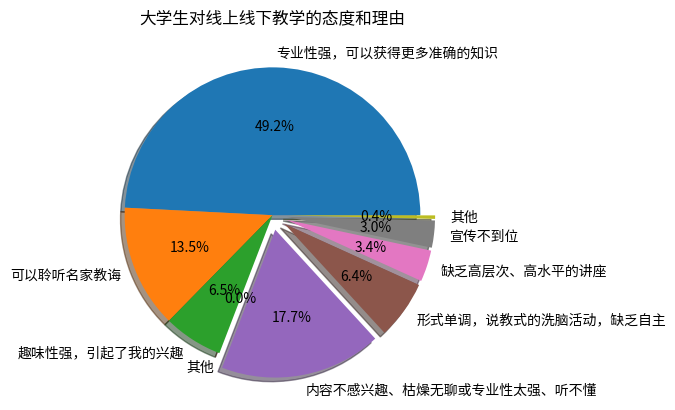

| 对线上线下教学感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 专业性强，可以获得更多准确的知识 | 515 | 49.19% |
| 可以聆听名家教诲 | 141 | 13.47% |
| 趣味性强，引起了我的兴趣 | 68 | 6.49% |
| 其他 | 0 | 0.00% |
| 感兴趣人数总计 | 724 | 69.15% |
| 内容不感兴趣、枯燥无聊或专业性太强、听不懂 | 185 | 17.67% |
| 形式单调，说教式的洗脑活动，缺乏自主 | 67 | 6.40% |
| 缺乏高层次、高水平的讲座 | 36 | 3.44% |
| 宣传不到位 | 31 | 2.96% |
| 其他 | 4 | 0.38% |
| 不感兴趣人数总计 | 323 | 30.85% |
| 总计 | 1047 | 100.00% |


In [20]:
def from_raw(name: str, total: int, pop: float, raw: str) -> AttitudeAndReasonTemplate:
    """ 从原始数据生成 AttitudeAndReasonTemplate 对象

    Args:
        name (str): 名称
        total (int): 总人数
        pop (float): 感兴趣的比例
        raw (str): 原始数据

    Returns:
        AttitudeAndReasonTemplate: AttitudeAndReasonTemplate 对象

    """
    pop_reason, unpop_reason = split_reason(raw)
    return AttitudeAndReasonTemplate(name, total, pop, pop_reason, unpop_reason)

test_template = from_raw("线上线下教学", 1047, 0.7, raw_reason1)
test_template.gen_population()
test_template.gen_pie_chart_explode_unpop()
print(test_template.gen_markdown_table())

| 分数段 | 60以下 | 60-69 | 70-79 | 80-89 | 90-100 | 总计 |
| :----- | :----- | :---- | :---- | :---- | :----- | :--- |
| 文科 | 0 | 1 | 9 | 26 | 30 | 66 |
| 理科 | 2 | 10 | 22 | 24 | 34 | 92 |
| 总计 | 2 | 11 | 31 | 50 | 64 | 158 |


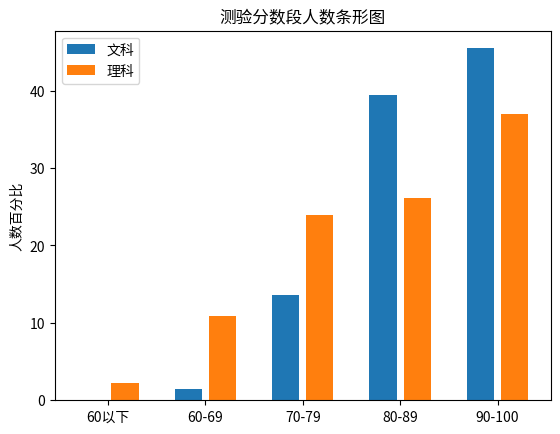

In [25]:
quiz_data = gen_quiz_data(77, 102)
print(gen_quiz_markdown_table(*quiz_data))
plot_quiz_bargraph(*quiz_data)

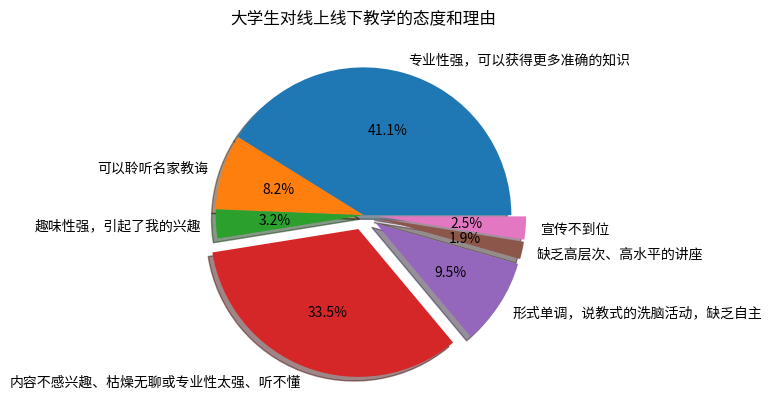

| 对线上线下教学感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 专业性强，可以获得更多准确的知识 | 65 | 41.14% |
| 可以聆听名家教诲 | 13 | 8.23% |
| 趣味性强，引起了我的兴趣 | 5 | 3.16% |
| 感兴趣人数总计 | 83 | 52.53% |
| 内容不感兴趣、枯燥无聊或专业性太强、听不懂 | 53 | 33.54% |
| 形式单调，说教式的洗脑活动，缺乏自主 | 15 | 9.49% |
| 缺乏高层次、高水平的讲座 | 3 | 1.90% |
| 宣传不到位 | 4 | 2.53% |
| 不感兴趣人数总计 | 75 | 47.47% |
| 总计 | 158 | 100.00% |


In [44]:
raw_reason1="""\
0.8 专业性强，可以获得更多准确的知识
0.15 可以聆听名家教诲
0.05 趣味性强，引起了我的兴趣

0.7 内容不感兴趣、枯燥无聊或专业性太强、听不懂
0.15 形式单调，说教式的洗脑活动，缺乏自主
0.05 缺乏高层次、高水平的讲座
0.09 宣传不到位
"""

test_template1 = from_raw("线上线下教学", 158, 0.5, raw_reason1)
test_template1.gen_population()
test_template1.gen_pie_chart_explode_unpop()
print(test_template1.gen_markdown_table())

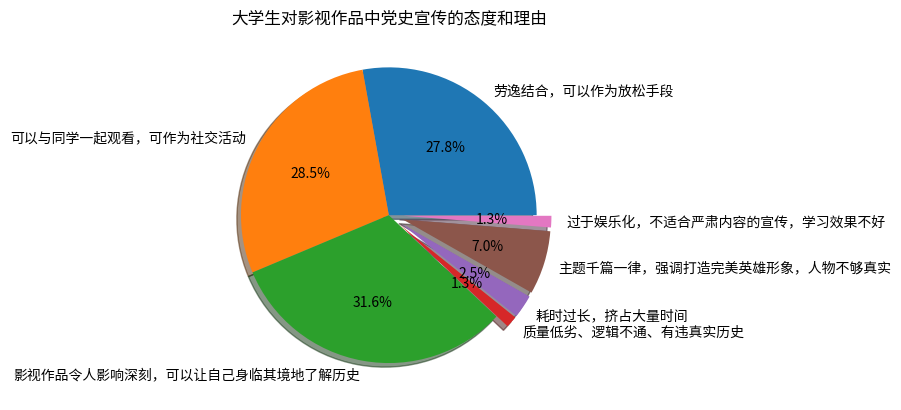

| 对影视作品中党史宣传感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 劳逸结合，可以作为放松手段 | 44 | 27.85% |
| 可以与同学一起观看，可作为社交活动 | 45 | 28.48% |
| 影视作品令人影响深刻，可以让自己身临其境地了解历史 | 50 | 31.65% |
| 感兴趣人数总计 | 139 | 87.97% |
| 质量低劣、逻辑不通、有违真实历史 | 2 | 1.27% |
| 耗时过长，挤占大量时间 | 4 | 2.53% |
| 主题千篇一律，强调打造完美英雄形象，人物不够真实 | 11 | 6.96% |
| 过于娱乐化，不适合严肃内容的宣传，学习效果不好 | 2 | 1.27% |
| 不感兴趣人数总计 | 19 | 12.03% |
| 总计 | 158 | 100.00% |


In [38]:
raw_reason2="""\
0.3 劳逸结合，可以作为放松手段
0.4 可以与同学一起观看，可作为社交活动
0.3 影视作品令人影响深刻，可以让自己身临其境地了解历史

0.1 质量低劣、逻辑不通、有违真实历史
0.1 耗时过长，挤占大量时间
0.6 主题千篇一律，强调打造完美英雄形象，人物不够真实
0.2 过于娱乐化，不适合严肃内容的宣传，学习效果不好
"""

test_template2 = from_raw("影视作品中党史宣传", 158, 0.9, raw_reason2)
test_template2.gen_population()
test_template2.gen_pie_chart_explode_unpop()
print(test_template2.gen_markdown_table())

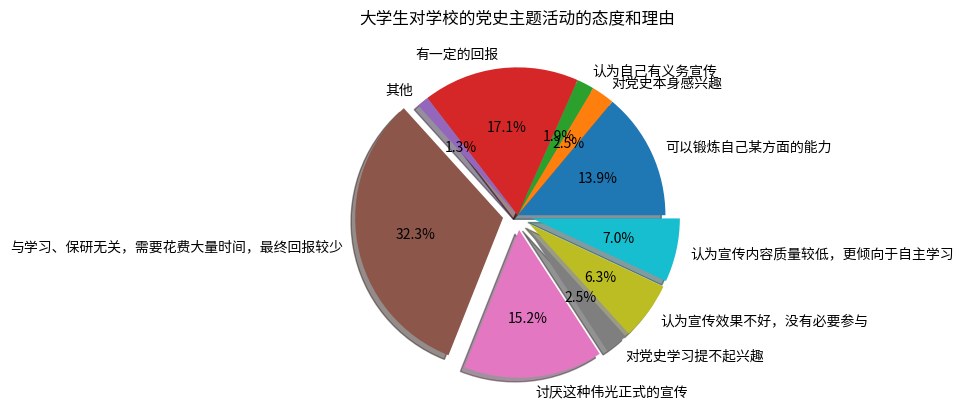

| 对学校的党史主题活动感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 可以锻炼自己某方面的能力 | 22 | 13.92% |
| 对党史本身感兴趣 | 4 | 2.53% |
| 认为自己有义务宣传 | 3 | 1.90% |
| 有一定的回报 | 27 | 17.09% |
| 其他 | 2 | 1.27% |
| 感兴趣人数总计 | 58 | 36.71% |
| 与学习、保研无关，需要花费大量时间，最终回报较少 | 51 | 32.28% |
| 讨厌这种伟光正式的宣传 | 24 | 15.19% |
| 对党史学习提不起兴趣 | 4 | 2.53% |
| 认为宣传效果不好，没有必要参与 | 10 | 6.33% |
| 认为宣传内容质量较低，更倾向于自主学习 | 11 | 6.96% |
| 不感兴趣人数总计 | 100 | 63.29% |
| 总计 | 158 | 100.00% |


In [47]:
raw_reason3="""\
0.4 可以锻炼自己某方面的能力
0.1 对党史本身感兴趣
0.07 认为自己有义务宣传
0.4 有一定的回报
0.03 其他

0.6 与学习、保研无关，需要花费大量时间，最终回报较少
0.2 讨厌这种伟光正式的宣传
0.03 对党史学习提不起兴趣
0.1 认为宣传效果不好，没有必要参与
0.06 认为宣传内容质量较低，更倾向于自主学习
"""

test_template3 = from_raw("学校的党史主题活动", 158, 0.4, raw_reason3)
test_template3.gen_population()
test_template3.gen_pie_chart_explode_unpop()
print(test_template3.gen_markdown_table())

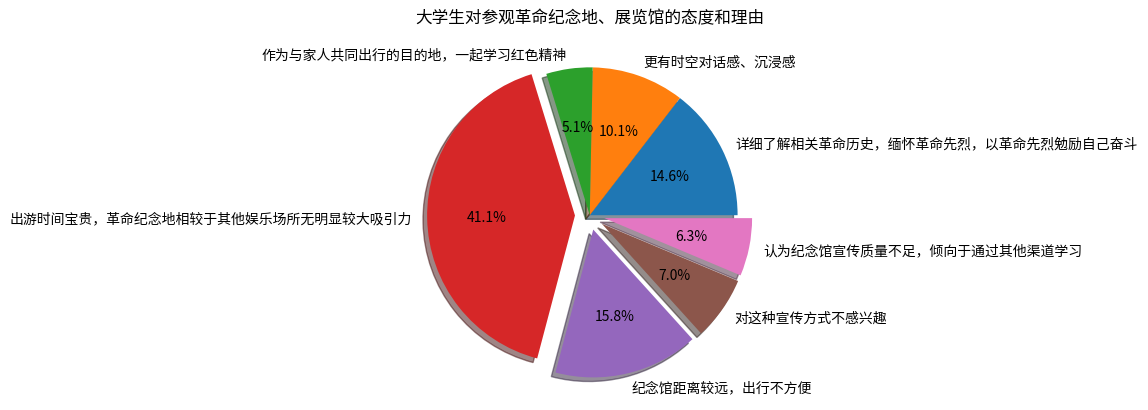

| 对参观革命纪念地、展览馆感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 详细了解相关革命历史，缅怀革命先烈，以革命先烈勉励自己奋斗 | 23 | 14.56% |
| 更有时空对话感、沉浸感 | 16 | 10.13% |
| 作为与家人共同出行的目的地，一起学习红色精神 | 8 | 5.06% |
| 感兴趣人数总计 | 47 | 29.75% |
| 出游时间宝贵，革命纪念地相较于其他娱乐场所无明显较大吸引力 | 65 | 41.14% |
| 纪念馆距离较远，出行不方便 | 25 | 15.82% |
| 对这种宣传方式不感兴趣 | 11 | 6.96% |
| 认为纪念馆宣传质量不足，倾向于通过其他渠道学习 | 10 | 6.33% |
| 不感兴趣人数总计 | 111 | 70.25% |
| 总计 | 158 | 100.00% |


In [49]:
raw_reason4="""\
0.5 详细了解相关革命历史，缅怀革命先烈，以革命先烈勉励自己奋斗
0.3 更有时空对话感、沉浸感
0.2 作为与家人共同出行的目的地，一起学习红色精神

0.6 出游时间宝贵，革命纪念地相较于其他娱乐场所无明显较大吸引力
0.2 纪念馆距离较远，出行不方便
0.1 对这种宣传方式不感兴趣
0.1 认为纪念馆宣传质量不足，倾向于通过其他渠道学习
"""

test_template4 = from_raw("参观革命纪念地、展览馆", 158, 0.3, raw_reason4)
test_template4.gen_population()
test_template4.gen_pie_chart_explode_unpop()
print(test_template4.gen_markdown_table())

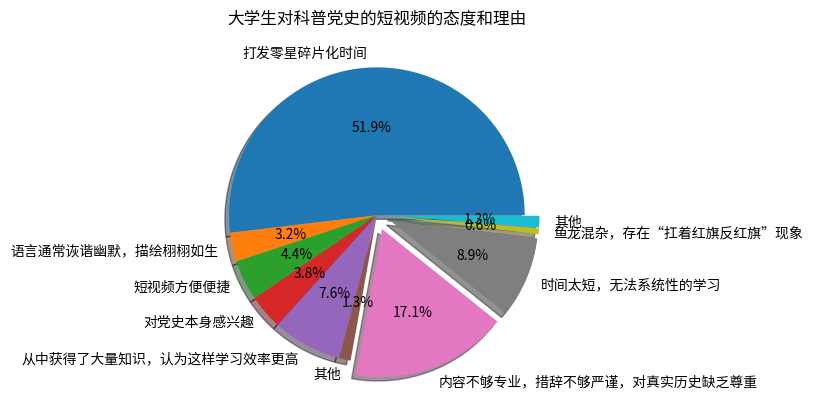

| 对科普党史的短视频感兴趣/不感兴趣的理由 | 人数 | 人数百分比 |
| :----------------------------- | :--- | :--------- |
| 打发零星碎片化时间 | 82 | 51.90% |
| 语言通常诙谐幽默，描绘栩栩如生 | 5 | 3.16% |
| 短视频方便便捷 | 7 | 4.43% |
| 对党史本身感兴趣 | 6 | 3.80% |
| 从中获得了大量知识，认为这样学习效率更高 | 12 | 7.59% |
| 其他 | 2 | 1.27% |
| 感兴趣人数总计 | 114 | 72.15% |
| 内容不够专业，措辞不够严谨，对真实历史缺乏尊重 | 27 | 17.09% |
| 时间太短，无法系统性的学习 | 14 | 8.86% |
| 鱼龙混杂，存在“扛着红旗反红旗”现象 | 1 | 0.63% |
| 其他 | 2 | 1.27% |
| 不感兴趣人数总计 | 44 | 27.85% |
| 总计 | 158 | 100.00% |


In [52]:
raw_reason5="""\
0.7 打发零星碎片化时间
0.05 语言通常诙谐幽默，描绘栩栩如生
0.05 短视频方便便捷
0.05 对党史本身感兴趣
0.13 从中获得了大量知识，认为这样学习效率更高
0.02 其他

0.7 内容不够专业，措辞不够严谨，对真实历史缺乏尊重
0.23 时间太短，无法系统性的学习
0.05 鱼龙混杂，存在“扛着红旗反红旗”现象
0.02 其他
"""

test_template5 = from_raw("科普党史的短视频", 158, 0.7, raw_reason5)
test_template5.gen_population()
test_template5.gen_pie_chart_explode_unpop()
print(test_template5.gen_markdown_table())

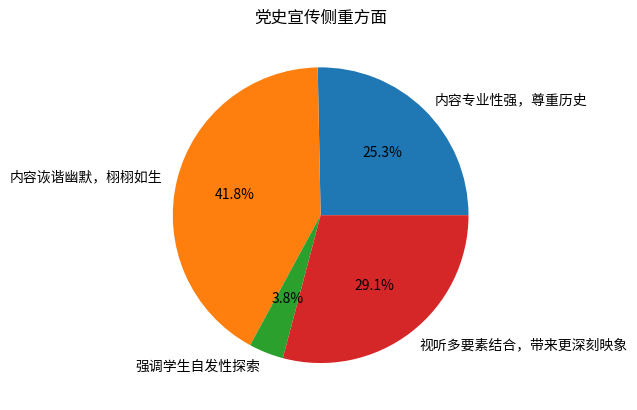

| 您认为党史宣传做到哪些方面更能吸引到您？| 人数 | 占比 |
| :--- | :--- | :--- |
| 内容专业性强，尊重历史 | 40 | 25.32% |
| 内容诙谐幽默，栩栩如生 | 66 | 41.77% |
| 强调学生自发性探索 | 6 | 3.80% |
| 视听多要素结合，带来更深刻映象 | 46 | 29.11% |
| 总计 | 158 | 100.00% |



In [60]:
# 党史宣传重要方面
raw_aspect_with_weight="""\
6 内容专业性强，尊重历史
10 内容诙谐幽默，栩栩如生
1 强调学生自发性探索
8 视听多要素结合，带来更深刻映象
"""

lines = raw_aspect_with_weight.split("\n")
lines.remove("")
aspect_weight = np.array([float(line.split()[0]) for line in lines])
aspect_name = np.array([line.split()[1] for line in lines])
aspect_weight = aspect_weight / aspect_weight.sum()

# 生成党史宣传重要方面的饼图
populations = np.random.multinomial(158, aspect_weight)
plt.pie(populations, labels=aspect_name, autopct='%1.1f%%')
plt.title("党史宣传侧重方面")
plt.show()

# 生成党史宣传重要方面的markdown表格
head_line = """\
| 您认为党史宣传做到哪些方面更能吸引到您？| 人数 | 占比 |
| :--- | :--- | :--- |
"""
table = head_line
for i in range(len(aspect_name)):
    table += "| {} | {} | {:.2%} |\n".format(aspect_name[i], populations[i], populations[i] / 158)

table += "| 总计 | 158 | 100.00% |\n"
print(table)
